In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import random
from scipy.stats.distributions import t
# np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
random_seed = 39
random.seed(random_seed)
np.random.seed(random_seed)

In [14]:
def get_dur(k, d_eff, p, alpha=0.05, beta=0.2):
    sigma_1, sigma_2 = p[0]*(1-p[0]), p[1]*(1-p[1])
    stat = sps.norm.ppf(1 - alpha/2) + sps.norm.ppf(1-beta)
    n = (k+1) * stat ** 2 * (sigma_1 ** 2 + sigma_2 **2 / k) / (d_eff ** 2)
    n = int(np.ceil(n))
    return n

def power(p, n, alpha = 0.05):
    l = []
    cr = ([], [])
    for _ in range(1000):
        for j in 0, 1:
            for i in range(100):
                n_views = int(sps.expon.rvs(loc=100, scale=100))
                clicks = np.sum(sps.bernoulli.rvs(p=p[j], size=n//2))
                cr[j].append(np.sum(clicks)/ n_views)

        p_val = sps.ttest_ind(cr[0], cr[1]).pvalue
        l.append(p_val)
    l = np.array(l)
    pr = len(l[l < alpha]) / len(l) * 100
    print(f"T test, Мощность = {pr}\n")



p = [0.05, 0.06]
n = get_dur(1, p[1] - p[0], p)
print(f"My n - {n}")
power(p, n)
print("website - 14913")
power(p, 14913)

My n - 854
T test, Мощность = 100.0

website - 14913
T test, Мощность = 100.0



In [63]:
def get_p_val(p = [0.05, 0.05]):
    p_values = []
    p_values_lin = []
    for _ in range(1000):
        views = ([], [])
        clk = ([], [])
        cr = ([], [])
        for j in 0, 1:
            for i in range(100):

                n_views = int(sps.expon.rvs(loc=100, scale=100))
                clicks = np.sum(sps.bernoulli.rvs(p=p[j], size=n_views))

                views[j].append(n_views)
                clk[j].append(clicks)
                cr[j].append(np.sum(clicks)/ n_views)

        clk = np.array(clk)
        views = np.array(views)
        cr = np.array(cr)
        cr_A = np.sum(clk[0, : ]) / np.sum(views[0, : ])

        cr_lin = clk - cr_A * views
        p_value = sps.ttest_ind(cr[0, :], cr[1, :]).pvalue
        p_values.append(p_value)

        p_value_lin = sps.ttest_ind(cr_lin[0, :], cr_lin[1, :]).pvalue
        p_values_lin.append(p_value_lin)
    return np.array(p_values), np.array(p_values_lin)
p_values, p_values_lin = get_p_val(p = [0.05, 0.055])

In [67]:
alpha = 0.05
pr = len(p_values[p_values < alpha]) / len(p_values) * 100
print(f"T test, Мощность = {pr}\n")

pr = len(p_values_lin[p_values_lin < alpha]) / len(p_values_lin) * 100
print(f"T test, Мощность linearized = {pr}\n")

T test, Мощность = 54.6

T test, Мощность linearized = 60.0



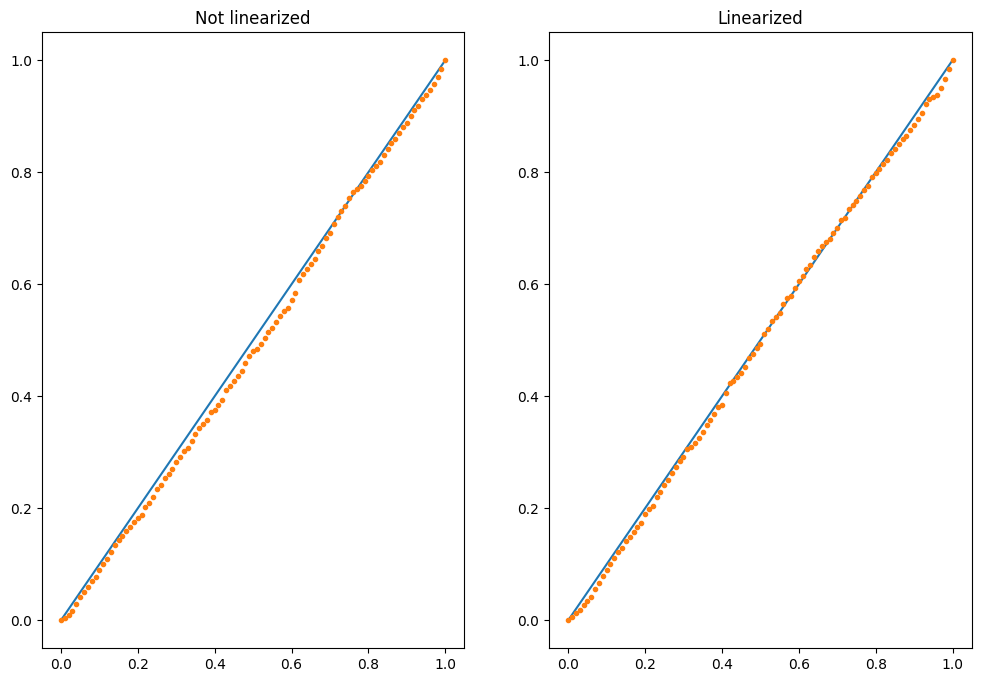

In [69]:
p_values, p_values_lin = get_p_val()
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
a = [0.01 * i for i in range(101)]
for i, j, k in zip(axes.flat, [p_values, p_values_lin], ["Not linearized", "Linearized"]):
    i.plot(a, a)
    num = [len(j[j < q]) / 1000 for q in a]
    i.plot(a, num, '.')
    i.set_title(k)

In [8]:
size = 1000
pre_exp = sps.norm.rvs(loc=100, scale=20, size=size)
def power(loc, scale):
    l1, l2 = [], []
    for _ in range(1000):
        arr1 = sps.norm.rvs(loc = loc[0], scale = scale, size = size) * pre_exp
        arr2 = sps.norm.rvs(loc = loc[1], scale = scale, size = size) * pre_exp

        l1.append(sps.ttest_ind(arr1, arr2).pvalue)
        q = np.cov(pre_exp, arr1)[0,1] / np.std(pre_exp)**2

        arr1 = arr1 - q * pre_exp
        arr2 = arr2 - q * pre_exp
        l2.append(sps.ttest_ind(arr1, arr2).pvalue)
    return np.array(l1), np.array(l2)
l1, l2 = power([1, 1.01], 0.1)

alpha = 0.05
pr = len(l1[l1 < alpha]) / len(l1) * 100
print(f"T test, Мощность = {pr}\n")

pr = len(l2[l2 < alpha]) / len(l2) * 100
print(f"T test, Мощность CUPED = {pr}\n")

T test, Мощность = 1.0

T test, Мощность CUPED = 58.9



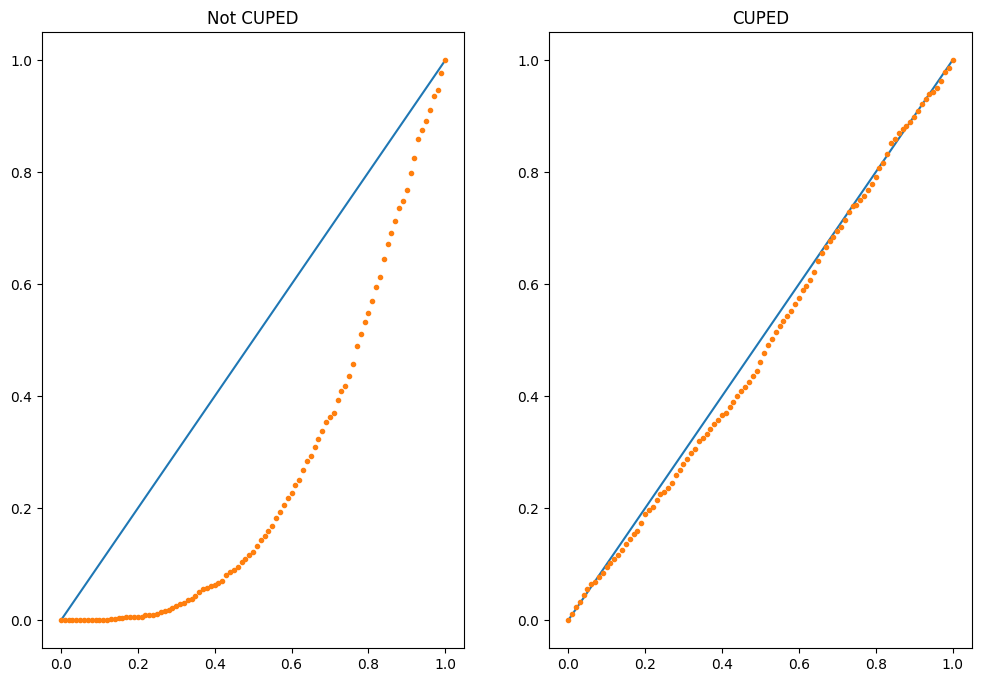

In [12]:
l1, l2 = power([1, 1], 0.1)
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
a = [0.01 * i for i in range(101)]
for i, j, k in zip(axes.flat, [l1, l2], ["Not CUPED", "CUPED"]):
    i.plot(a, a)
    num = [len(j[j < q]) / 1000 for q in a]
    i.plot(a, num, '.')
    i.set_title(k)